In [1]:
import pandas as pd
train_df=pd.read_csv('/kaggle/input/glasses-or-no-glasses/train.csv')
test_df=pd.read_csv('/kaggle/input/glasses-or-no-glasses/test.csv')

In [3]:
import pandas as pd

# Load your Excel/CSV file
df = pd.read_excel('/kaggle/input/mydata/Book1.xlsx')  # If you saved as Excel
# Or if CSV:
# df = pd.read_csv('/kaggle/input/your_csv_file.csv')

print(df.head())


          img  glasses
0  face-1.png        0
1  face-2.png        1
2  face-3.png        1
3  face-4.png        0
4  face-5.png        0


In [4]:
import cv2
import numpy as np
from tqdm import tqdm  # progress bar

image_folder = '/kaggle/input/glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/'
img_size = 64 

X = []
y = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = image_folder + row['img']
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize to 0-1
    X.append(img)
    y.append(row['glasses'])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape) 


100%|██████████| 4500/4500 [04:39<00:00, 16.13it/s]


(4500, 64, 64, 3) (4500,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(3600, 64, 64, 3) (900, 64, 64, 3)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


2025-05-20 21:39:28.166489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747777168.473445      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747777168.569197      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-20 21:39:44.686157: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,905 (796.50 KB)

 Trainable params: 203,905 (796.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=6, validation_data=(X_val, y_val))


Epoch 1/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.6353 - loss: 0.6209 - val_accuracy: 0.8678 - val_loss: 0.3119
Epoch 2/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.8534 - loss: 0.3350 - val_accuracy: 0.8733 - val_loss: 0.3139
Epoch 3/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8724 - loss: 0.3152 - val_accuracy: 0.8878 - val_loss: 0.2784
Epoch 4/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.8761 - loss: 0.2925 - val_accuracy: 0.8867 - val_loss: 0.2899
Epoch 5/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.8677 - loss: 0.2950 - val_accuracy: 0.8944 - val_loss: 0.2827
Epoch 6/6
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8867 - loss: 0.2872 - val_accuracy: 0.9033 - val_loss: 0.2593


In [8]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc}")
print(f"Validation loss: {val_loss}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9072 - loss: 0.2525
Validation Accuracy: 0.903333306312561
Validation loss: 0.2592502534389496


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict
preds = model.predict(X_val)
preds = (preds > 0.5).astype(int).flatten()  # Convert probabilities to 0/1 and flatten to 1D


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[[284  39]
 [ 48 529]]


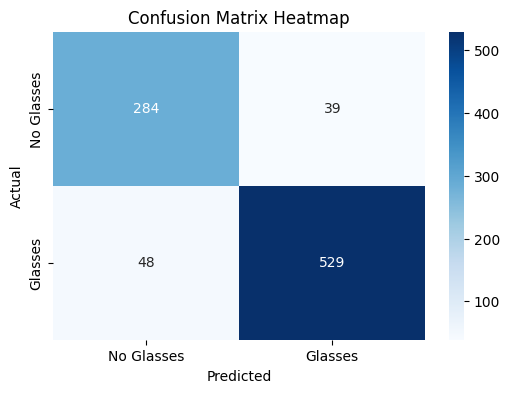

In [10]:
cm = confusion_matrix(y_val, preds)
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [11]:
def predict_single_image(img_path, model, img_size=64):
    import cv2
    import numpy as np

    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load {img_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize
    img = cv2.resize(img, (img_size, img_size))

    # Normalize
    img = img / 255.0

    # Expand dimensions to make it (1, img_size, img_size, 3)
    img_input = np.expand_dims(img, axis=0)

    # Predict
    pred = model.predict(img_input)
    pred_class = int(pred[0][0] > 0.5)  # 0 or 1

    # Map to label
    label = "Glasses" if pred_class == 1 else "No Glasses"
    return label


In [13]:
import pandas as pd

# Load the test.csv
test_df = pd.read_csv('/kaggle/input/glasses-or-no-glasses/test.csv')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image ID: 4991 => Prediction: No Glasses


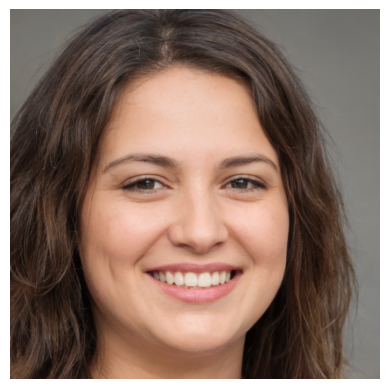

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image ID: 4992 => Prediction: No Glasses


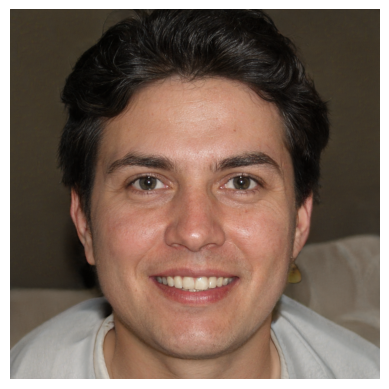

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image ID: 4993 => Prediction: No Glasses


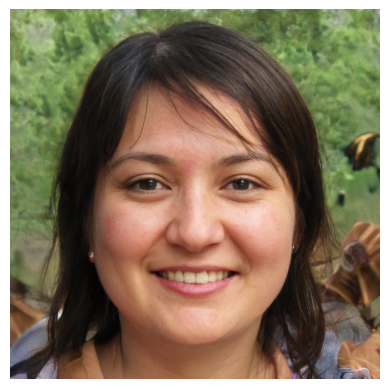

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image ID: 4994 => Prediction: Glasses


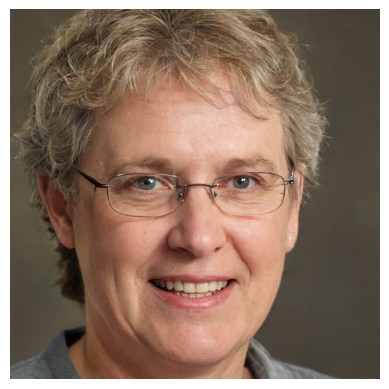

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image ID: 4995 => Prediction: No Glasses


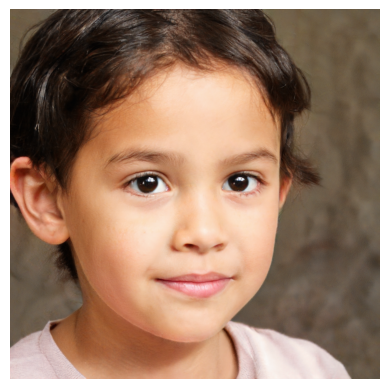

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image ID: 4996 => Prediction: Glasses


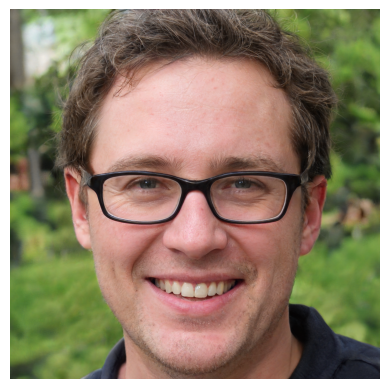

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image ID: 4997 => Prediction: Glasses


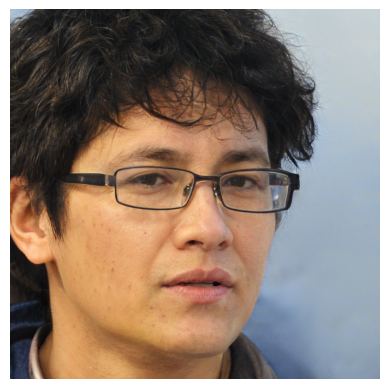

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image ID: 4998 => Prediction: Glasses


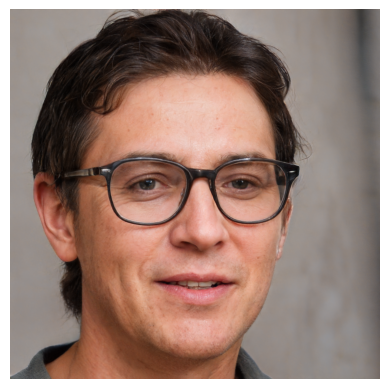

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image ID: 4999 => Prediction: No Glasses


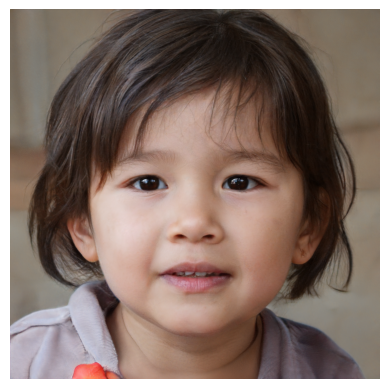

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image ID: 5000 => Prediction: Glasses


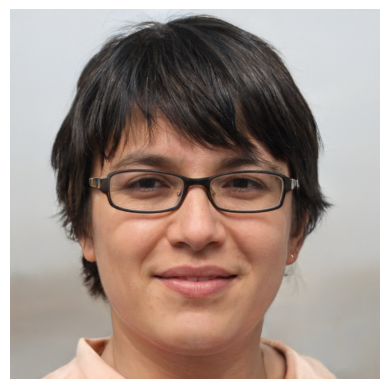

In [16]:

# Loop over first 10 ids
for i in range(490, 500):
    img_id = test_df.loc[i, 'id']
    img_path = f'/kaggle/input/glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-{img_id}.png'
    
    # Predict
    result = predict_single_image(img_path, model)
    print(f"Image ID: {img_id} => Prediction: {result}")
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


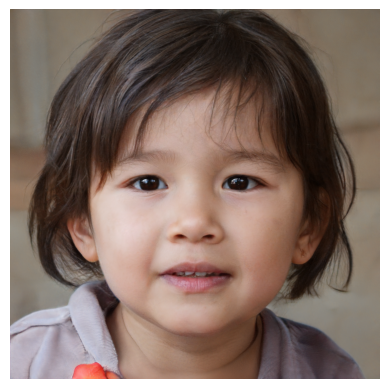

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = '/kaggle/input/glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-4999.png'
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()
